# Tarea: Predicción de Precios de Viviendas en Perú

**Nombres y Apellidos:** *JASON PAUL CAHUANA NINA*

## Motivación

En este mini-proyecto desarrollaremos y evaluaremos el rendimiento y la potencia predictiva de un modelo entrenado y probado sobre datos referentes al mercado inmobiliario de Perú.
Una vez conseguido un buen ajuste, utilizaremos este modelo para predecir el precio de viviendas en ese área.
Un modelo así sería muy valioso para una agencia inmobiliaria que pudiera hacer uso de la información proporcionada diariamente.

## Kaggle

--no disponible--

## Calificación

La nota final del trabajo está basada en el puntaje total obtenido en este notebook y esta dividido de la siguiente manera:

- Dataset  (6 puntos)
- Análisis Exploratorio de Datos (EDA) (6 puntos)
- Preparación de Datos (9 Puntos)
- Modelado (17 Puntos)


El total de puntos es $38$ $+$ $2$ puntos adicionales que se darán aquellos que participen activamente en el [foro de discusión](https://www.kaggle.com/c/reservas-de-hotel/discussion) de la competencia, ya sea preguntando sus dudas y/o ayudando a resolver dudas de otros. La escala de notas finales está dada a continuación:

|Puntaje| Nota |
|-------|-----|
|30 - 40| A |
|20 - 29| B |
|10 - 19| C |
| < 10 | D |

Aprueban los que obtienen una nota mínima de B.


## Importación de Librerías

Importe las librerías que usará en este ejercicio.

In [1]:
# TODO: Importar librerías para manipulación, visualización, 
#       preprocesamiento y modelado de datos
import numpy as np
import pandas as pd

## Dataset (6 Puntos)

El conjunto de datos contiene información de Precios de Viviendas que se obtienen desde `https://urbania.pe/buscar/venta-de-casas`.

El conjuntos deberá obtenerse usando el notebook `Scrapping_Urbania_venta.ipynb` 

### Descripción de Características

Describa las característcas seleccionadas:

|Nombre| Descripción |
|-------|-----|


In [2]:
#TODO: Cargue el conjunto de datos y muestre 8 registros
# Si esta usando colab puede cargar los datos desde |su drive o subir
# el archivo y descomprimirlo con el comando !unzip archivo.zip

data = pd.read_csv("datasetUrbania3.csv")
#data.head()


Muestre información de cada característica, incluyendo el tipo de dato y cantidad de registros.

In [3]:
#TODO: Mostrar información de cada característica
data.dtypes

Unnamed: 0        int64
l_tag            object
title            object
address          object
place            object
price1           object
price2          float64
description      object
url              object
mainfeatures     object
dtype: object

In [4]:
data.shape

(4875, 10)

**¿Con qué tipos de datos estamos trabajando?**

*estamos rtabajando datos de tipo object, es decir de string, solo uno tenemos que es un float*



### Valores Faltantes

Verifique si existen valores faltantes, para ello muestre una lista de todas características y el número de valores faltantes.

In [5]:
# TODO: Revisar si existen valores NaN
data.isnull().sum()

Unnamed: 0         0
l_tag           4111
title              0
address            0
place              0
price1            46
price2          4875
description        0
url                0
mainfeatures       0
dtype: int64

**¿Hay características con valores faltantes (NaN)? Si es así, indique los nombres de las características y su cantidad.**

*l_tag, price 1 y price2*

En caso de haber valores faltantes, reemplácelos con valores válidos para su posterior análisis.

In [4]:
data = data.dropna(axis=0, subset=['price1']) #elimnamos todas las  filas vacias de la columna "price1"
#remodificamos los indices
data=data.reset_index(drop=True)
data.head()

,Unnamed: 0,l_tag,title,address,place,price1,price2,description,url,mainfeatures
0,0,Proyecto,San Ildefonso de Ica,"Av. Cuatro con calle 10 - Mz ED lote 34, \n\t\...","La Tinguiña, Ica","S/ 85,700",NaN,Disfruta la comodidad de vivir en tu casa prop...,/inmueble/proyecto-san-ildefonso-de-ica-ica-la...,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do..."
1,1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,"Jr. Lima 156, \n\t\t\t\t\t\t\t\t Santa Patrici...","Santa Patricia, La Molina","S/ 1,582,875",NaN,Vendo casa amplia en plena esquina de 160m2 A....,/inmueble/venta-de-casa-en-santa-patricia-la-m...,"240 m² totales,240 m² techados,4 Dormitorios,3..."
2,2,Super destacado,Venta de Casa en El Sol de La Molina,"La Fontana, La Molina","La Fontana, La Molina","S/ 4,050,400",NaN,Vendo casa en urb. La fontana – la molina Tien...,/inmueble/venta-de-casa-en-la-fontana-la-molin...,"1050 m² totales,300 m² techados,0 Dormitorios,..."
3,3,Super destacado,Rebajada! Venta de Casa en San Isidro,"Corpac, San Isidro","Corpac, San Isidro","S/ 2,822,000",NaN,"Rebajada!! Hermosa casa en esquina, remodelada...",/inmueble/venta-de-casa-en-corpac-san-isidro-5...,"450 m² totales,450 m² techados,5 Dormitorios,5..."
4,4,Super destacado,Venta de Casa en Santiago de Surco,"Santa Rosa De Surco, Santiago de Surco","Santa Rosa De Surco, Santiago de Surco","S/ 1,261,600",NaN,Se remata casa en Surco por motivos de viaje c...,/inmueble/venta-de-casa-en-santa-rosa-de-surco...,"300 m² totales,181 m² techados,4 Dormitorios,3..."


In [5]:
data['price1']=data['price1'].str.replace('S/','')
#data.head()

In [6]:
dftem=data
for i in range(data.shape[0]):
    dftem.loc[i, 'price1'] = dftem['price1'][i][:-4]
    

In [7]:
data['price1']

0              85
1           1,582
2           4,050
3           2,822
4           1,261
          ...    
4824    USD 1,850
4825      USD 750
4826        3,652
4827    USD 1,400
4828    USD 1,450
Name: price1, Length: 4829, dtype: object

In [9]:
for i in range(dftem.shape[0]):
    if( "USD" in dftem['price1'][i]):
        dftem['price1'][i]=dftem['price1'][i].replace('USD','') #quitamos los valores que  tienen "usd"
        dftem['price1'][i]=dftem['price1'][i].replace(' ','') #quitamos los valores que  tienen "usd"
        dftem['price1']=dftem['price1'].str.replace(',','') #quitamos la coma de nuestros valores de precio
        valor=float(dftem['price1'][i])
        dftem['price1'][i]=  str(valor*3.3)
        #print (dftem['price1'][i])

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
#elimnamos las filas que no son vacias pero no tienen datos
for i in range(dftem.shape[0]):
    #print(i , "-",dftem['price1'][i] )
    if (len(str(dftem['price1'][i]))<=1):
        dftem=dftem.drop([i],axis=0)
        
data = data.dropna(axis=0, subset=['price1']) #elimnamos todas las  filas vacias de la columna "price1"
#remodificamos los indices
data=data.reset_index(drop=True)


In [ ]:
#dftem['price1'][i]=float(dftem['price1'][i])

In [23]:
       
#data.isnull().sum() #vemos cuantos vacios hay

dftem['price1']=dftem['price1'].astype('float')
dftem.shape #vemos la dimension como varia

(4813, 10)

In [24]:
data=dftem

In [25]:
data=data.drop(['price2'],axis=1) #eliminamos la columna "price 2 que no nos sirve ce nada"

In [26]:
data.isnull().sum()

Unnamed: 0         0
l_tag           4056
title              0
address            0
place              0
price1             0
description        0
url                0
mainfeatures       0
dtype: int64

In [27]:
data['l_tag'].value_counts()
data["l_tag"].fillna("No Category", inplace = True)
data['l_tag'].value_counts()
#veamos los lugares que tiene
data['place'].value_counts()

 La Molina, Lima                   376
 Santiago de Surco, Lima           326
 La Planicie, La Molina            277
 San Isidro, Lima                  204
 El Sol De La Molina, La Molina    179
                                  ... 
 San Jorge, Santiago de Surco        1
 Manylsa, Ate Vitarte                1
 Huarupampa, Huaraz                  1
 Lunahuana, Cañete                   1
 La Virreyna, Santiago de Surco      1
Name: place, Length: 592, dtype: int64

In [28]:
df=data
df['Distrito'], df['Ciudad'] = data['place'].str.split(',',1).str

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [29]:
df.head()

,Unnamed: 0,l_tag,title,address,place,price1,description,url,mainfeatures,Distrito,Ciudad
0,0,Proyecto,San Ildefonso de Ica,"Av. Cuatro con calle 10 - Mz ED lote 34, \n\t\...","La Tinguiña, Ica",85.0,Disfruta la comodidad de vivir en tu casa prop...,/inmueble/proyecto-san-ildefonso-de-ica-ica-la...,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",La Tinguiña,Ica
1,1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,"Jr. Lima 156, \n\t\t\t\t\t\t\t\t Santa Patrici...","Santa Patricia, La Molina",1582.0,Vendo casa amplia en plena esquina de 160m2 A....,/inmueble/venta-de-casa-en-santa-patricia-la-m...,"240 m² totales,240 m² techados,4 Dormitorios,3...",Santa Patricia,La Molina
2,2,Super destacado,Venta de Casa en El Sol de La Molina,"La Fontana, La Molina","La Fontana, La Molina",4050.0,Vendo casa en urb. La fontana – la molina Tien...,/inmueble/venta-de-casa-en-la-fontana-la-molin...,"1050 m² totales,300 m² techados,0 Dormitorios,...",La Fontana,La Molina
3,3,Super destacado,Rebajada! Venta de Casa en San Isidro,"Corpac, San Isidro","Corpac, San Isidro",2822.0,"Rebajada!! Hermosa casa en esquina, remodelada...",/inmueble/venta-de-casa-en-corpac-san-isidro-5...,"450 m² totales,450 m² techados,5 Dormitorios,5...",Corpac,San Isidro
4,4,Super destacado,Venta de Casa en Santiago de Surco,"Santa Rosa De Surco, Santiago de Surco","Santa Rosa De Surco, Santiago de Surco",1261.0,Se remata casa en Surco por motivos de viaje c...,/inmueble/venta-de-casa-en-santa-rosa-de-surco...,"300 m² totales,181 m² techados,4 Dormitorios,3...",Santa Rosa De Surco,Santiago de Surco


In [30]:
df['Distrito'].value_counts()

 La Molina              376
 Santiago de Surco      326
 La Planicie            278
 San Isidro             206
 El Sol De La Molina    179
                       ... 
 Santa Ana                1
 San Jorge                1
 Santa Isolina            1
 Chontabamba              1
 Chincha                  1
Name: Distrito, Length: 546, dtype: int64

In [31]:
places=pd.read_csv("Departamento_Provincia_Distrito_Peru")
places.head()

,departamento,provincia,distrito
0,Amazonas,Chachapoyas,Chachapoyas
1,Amazonas,Chachapoyas,Asunción
2,Amazonas,Chachapoyas,Balsas
3,Amazonas,Chachapoyas,Cheto
4,Amazonas,Chachapoyas,Chiliquin


In [32]:
data=data.drop(['address'], axis=1) #eliminamos esta columna no tan importante
data=data.drop(['Unnamed: 0'], axis=1) #eliminamos esta columna no tan importante
data=data.drop(['url'], axis=1) #eliminamos esta columna no tan importante
data=data.drop(['description'], axis=1) #eliminamos esta columna no tan importante
data.head()

,l_tag,title,place,price1,mainfeatures,Distrito,Ciudad
0,Proyecto,San Ildefonso de Ica,"La Tinguiña, Ica",85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",La Tinguiña,Ica
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,"Santa Patricia, La Molina",1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Santa Patricia,La Molina
2,Super destacado,Venta de Casa en El Sol de La Molina,"La Fontana, La Molina",4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",La Fontana,La Molina
3,Super destacado,Rebajada! Venta de Casa en San Isidro,"Corpac, San Isidro",2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Corpac,San Isidro
4,Super destacado,Venta de Casa en Santiago de Surco,"Santa Rosa De Surco, Santiago de Surco",1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Santa Rosa De Surco,Santiago de Surco


In [33]:
data.shape[0]

4813

In [34]:
#creamos nuestro dataframeTemplate
#dfn = pd.DataFrame(index=range(data.shape[0],data.shape[1]),columns=['distrito', 'provincia', 'departamento'])
#dfn = pd.DataFrame(columns=('distrito', 'provincia', 'departamento'))

dummyarray = np.empty((data.shape[0],3))
dummyarray[:] = np.nan

dfn = pd.DataFrame(dummyarray)
#dfn = pd.DataFrame(columns=('distrito', 'provincia', 'departamento'))
dfn.columns=['departamento','provincia','distrito']
dfn.shape
dfn.head()

,departamento,provincia,distrito
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [35]:
#hacemos la siguiente operación porque hay un espacio en blanco cuando empieza el texto
data['Distrito']=data['Distrito'].map(lambda x: str(x)[1:])
data['Distrito'][0]
data['Ciudad'][0]#notamos que tiene el mismo error que la columna distrito

' Ica'

In [36]:
#hacemos la siguiente operación porque hay un espacio en blanco cuando empieza el texto
data['Ciudad']=data['Ciudad'].map(lambda x: str(x)[1:])
data['Ciudad'][0]
#solucionamos ese problema

'Ica'

In [37]:
places.head()

,departamento,provincia,distrito
0,Amazonas,Chachapoyas,Chachapoyas
1,Amazonas,Chachapoyas,Asunción
2,Amazonas,Chachapoyas,Balsas
3,Amazonas,Chachapoyas,Cheto
4,Amazonas,Chachapoyas,Chiliquin


In [38]:
index=[]
for i in range(data.shape[0]):
    index.append(i)
data=data.reindex(index) #modificamos los indices de la data 

In [23]:
#data.head()

In [39]:
for i in range(data.shape[0]): #recorremos todas las filas
    for d in range(places.shape[0]): #recorremos todas las filas de nuestro dataframe places
               #### inciamos con  Distrito de nuestra "data"
        #print("dato: "+data['Distrito'][i]+ " -- "+ data['Ciudad'][i])
        #print("places depto: "+places['departamento'][d])
        #print("entro")
        if (data['Distrito'][i]==places['distrito'][d]):
            #dfn['distrito'][i]=places['distrito'][d]
            dfn.loc[i, 'distrito'] = places['distrito'][d]
            #print("entro1: "+ "data: "+data['Distrito'][i]+ " places: "+ places['distrito'][d])
            
        if (data['Distrito'][i]==places['provincia'][d]):
            #dfn['provincia'][i]=places['provincia'][d]
            dfn.loc[i, 'provincia'] = places['provincia'][d]
            #print("entro2: "+ "data: "+data['Distrito'][i]+ "places: "+ places['provincia'][d])
            
        if (data['Distrito'][i]==places['departamento'][d]):
            #dfn['departamento'][i]=places['departamento'][d]
            dfn.loc[i, 'departamento'] = places['departamento'][d]
            #print("entro3: "+ "data: "+data['Distrito'][i]+ "places: "+ places['departamento'][d])
             
                #### inciamos con  Ciudad de nuestra "data"
                
        if (data['Ciudad'][i]==places['distrito'][d]):
            #dfn['distrito'][i]=places['distrito'][d]
            #print("entro1: "+ "data: "+data['Ciudad'][i]+ " places: "+ places['distrito'][d])
            dfn.loc[i, 'distrito'] = places['distrito'][d]
            
            
        if (data['Ciudad'][i]==places['provincia'][d]):
            #dfn['provincia'][i]=places['provincia'][d]
            dfn.loc[i, 'provincia'] = places['provincia'][d]
            #print("entro1: "+ "data: "+data['Ciudad'][i]+ "places: "+ places['provincia'][d])
            
        if (data['Ciudad'][i]==places['departamento'][d]):
            #dfn['departamento'][i]=places['departamento'][d]
            dfn.loc[i, 'departamento'] = places['departamento'][d]
            #print("entro1: "+ "data: "+data['Ciudad'][i]+ "places: "+ places['departamento'][d])
            
        #print("i:"+str(i)+"  d: "+str(d))
        
        
        
    

In [40]:
dfn.head()

,departamento,provincia,distrito
0,Ica,NaN,La Tinguiña
1,NaN,NaN,La Molina
2,NaN,NaN,La Molina
3,NaN,NaN,San Isidro
4,NaN,NaN,Santiago de Surco


In [41]:
dfn.shape

(4813, 3)

In [42]:
data.shape

(4813, 7)

In [43]:
##llenamos las provincias
for i in range(dfn.shape[0]): #recorremos todas las filas
    for d in range(places.shape[0]): #recorremos todas las filas de nuestro dataframe places
               #### inciamos con  Distrito de nuestra "data"
        #print("dato: "+data['Distrito'][i]+ " -- "+ data['Ciudad'][i])
        #print("places depto: "+places['departamento'][d])
        #print("entro")
        if (dfn['distrito'][i]==places['distrito'][d]):
            #dfn['distrito'][i]=places['distrito'][d]
            dfn.loc[i, 'provincia'] = places['provincia'][d]
       

In [44]:
##llenamos los departamentos
for i in range(dfn.shape[0]): #recorremos todas las filas
    for d in range(places.shape[0]): #recorremos todas las filas de nuestro dataframe places
               #### inciamos con  Distrito de nuestra "data"
        #print("dato: "+data['Distrito'][i]+ " -- "+ data['Ciudad'][i])
        #print("places depto: "+places['departamento'][d])
        #print("entro")
        if (dfn['provincia'][i]==places['provincia'][d]):
            #dfn['distrito'][i]=places['distrito'][d]
            dfn.loc[i, 'departamento'] = places['departamento'][d]

In [45]:
#dfn.head()
dfn['distrito'].value_counts().sum()

4717

In [46]:
dfn['departamento'].value_counts().sum()

4717

In [47]:
dfn['provincia'].value_counts().sum()

4717

In [ ]:
#juntamos los dos dataframes

In [48]:
data.shape

(4813, 7)

In [49]:
result = pd.concat([data, dfn], axis=1, sort=False)

In [50]:
result.head()

,l_tag,title,place,price1,mainfeatures,Distrito,Ciudad,departamento,provincia,distrito
0,Proyecto,San Ildefonso de Ica,"La Tinguiña, Ica",85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",La Tinguiña,Ica,Ica,Ica,La Tinguiña
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,"Santa Patricia, La Molina",1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Santa Patricia,La Molina,Lima,Lima,La Molina
2,Super destacado,Venta de Casa en El Sol de La Molina,"La Fontana, La Molina",4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",La Fontana,La Molina,Lima,Lima,La Molina
3,Super destacado,Rebajada! Venta de Casa en San Isidro,"Corpac, San Isidro",2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Corpac,San Isidro,Lima,Lima,San Isidro
4,Super destacado,Venta de Casa en Santiago de Surco,"Santa Rosa De Surco, Santiago de Surco",1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Santa Rosa De Surco,Santiago de Surco,Lima,Lima,Santiago de Surco


In [51]:
result.shape

(4813, 10)

In [52]:
result=result.drop(['Distrito'], axis=1) #eliminamos esta columna con malos datos
result=result.drop(['Ciudad'], axis=1) #eliminamos esta columna con malos datos
result=result.drop(['place'], axis=1) #eliminamos esta columna que ya no nos sirve
result.head()


,l_tag,title,price1,mainfeatures,departamento,provincia,distrito
0,Proyecto,San Ildefonso de Ica,85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",Ica,Ica,La Tinguiña
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Lima,Lima,La Molina
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",Lima,Lima,La Molina
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Lima,Lima,San Isidro
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Lima,Lima,Santiago de Surco


In [53]:
result=result.dropna()#ahora sí eliminamos todas las filas que estan vacias

In [54]:
result.shape

(4717, 7)

In [55]:
result["price1"]= pd.to_numeric(result["price1"])

In [56]:
result.head()

,l_tag,title,price1,mainfeatures,departamento,provincia,distrito
0,Proyecto,San Ildefonso de Ica,85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",Ica,Ica,La Tinguiña
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Lima,Lima,La Molina
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",Lima,Lima,La Molina
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Lima,Lima,San Isidro
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Lima,Lima,Santiago de Surco


In [57]:
dft=result.dropna()

In [58]:
dft.head()

,l_tag,title,price1,mainfeatures,departamento,provincia,distrito
0,Proyecto,San Ildefonso de Ica,85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",Ica,Ica,La Tinguiña
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Lima,Lima,La Molina
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",Lima,Lima,La Molina
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Lima,Lima,San Isidro
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Lima,Lima,Santiago de Surco


In [59]:
index=[]
for i in range(dft.shape[0]):
    index.append(i)
dft=dft.reindex(index) #modificamos los indices de la data 

In [60]:
dft.head()

,l_tag,title,price1,mainfeatures,departamento,provincia,distrito
0,Proyecto,San Ildefonso de Ica,85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",Ica,Ica,La Tinguiña
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Lima,Lima,La Molina
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",Lima,Lima,La Molina
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Lima,Lima,San Isidro
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Lima,Lima,Santiago de Surco


In [61]:
#result['mainfeatures']
df=result
df['metros'], df['techados'], df['dormitorios'] , df['baños'] , df['estacionamientos'] = result['mainfeatures'].str.split(',',4).str
df.head()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


,l_tag,title,price1,mainfeatures,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Proyecto,San Ildefonso de Ica,85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",Ica,Ica,La Tinguiña,57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 dormitorios,30 \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\tm² techados,83 \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\tm² totales,
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Lima,Lima,La Molina,240 m² totales,240 m² techados,4 Dormitorios,3 Baños,"1 Estacionamiento,"
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",Lima,Lima,La Molina,1050 m² totales,300 m² techados,0 Dormitorios,0 Baños,
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Lima,Lima,San Isidro,450 m² totales,450 m² techados,5 Dormitorios,5 Baños,"3 Estacionamientos,"
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Lima,Lima,Santiago de Surco,300 m² totales,181 m² techados,4 Dormitorios,3 Baños,


In [62]:
#df.index.values
df=df.dropna()#eliminamos vacios

In [63]:
df=df.reset_index(drop=True)
df.head()

,l_tag,title,price1,mainfeatures,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Proyecto,San Ildefonso de Ica,85.0,"57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 do...",Ica,Ica,La Tinguiña,57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 dormitorios,30 \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\tm² techados,83 \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\tm² totales,
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,"240 m² totales,240 m² techados,4 Dormitorios,3...",Lima,Lima,La Molina,240 m² totales,240 m² techados,4 Dormitorios,3 Baños,"1 Estacionamiento,"
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,"1050 m² totales,300 m² techados,0 Dormitorios,...",Lima,Lima,La Molina,1050 m² totales,300 m² techados,0 Dormitorios,0 Baños,
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,"450 m² totales,450 m² techados,5 Dormitorios,5...",Lima,Lima,San Isidro,450 m² totales,450 m² techados,5 Dormitorios,5 Baños,"3 Estacionamientos,"
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,"300 m² totales,181 m² techados,4 Dormitorios,3...",Lima,Lima,Santiago de Surco,300 m² totales,181 m² techados,4 Dormitorios,3 Baños,


In [64]:
for i in range(df.shape[0]):
    df['metros'][i]=df['metros'][i].replace("m² totales", "")

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df=df.drop(['mainfeatures'], axis=1) #eliminamos esta columna que ya tenemos segmentada

In [66]:
df.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Proyecto,San Ildefonso de Ica,85.0,Ica,Ica,La Tinguiña,57 \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tunidades,2 dormitorios,30 \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\tm² techados,83 \n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\tm² totales,
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,Lima,Lima,La Molina,240,240 m² techados,4 Dormitorios,3 Baños,"1 Estacionamiento,"
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,Lima,Lima,La Molina,1050,300 m² techados,0 Dormitorios,0 Baños,
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,Lima,Lima,San Isidro,450,450 m² techados,5 Dormitorios,5 Baños,"3 Estacionamientos,"
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,Lima,Lima,Santiago de Surco,300,181 m² techados,4 Dormitorios,3 Baños,


In [67]:
count=0
for i in range(df.shape[0]):
    if( "unidad"  in df['metros'][i]): #vemos cuantos campos  hay con estos datos
        count+=1
        print(i)
print(count)
    

0
1


In [ ]:
#vemos que solo hay un dato que en este caso es el primero, entocnes lo eliminamos y remodificamos los indices

In [68]:
df=df.drop([0],axis=0)
df.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
1,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,Lima,Lima,La Molina,240,240 m² techados,4 Dormitorios,3 Baños,"1 Estacionamiento,"
2,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,Lima,Lima,La Molina,1050,300 m² techados,0 Dormitorios,0 Baños,
3,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,Lima,Lima,San Isidro,450,450 m² techados,5 Dormitorios,5 Baños,"3 Estacionamientos,"
4,Super destacado,Venta de Casa en Santiago de Surco,1261.0,Lima,Lima,Santiago de Surco,300,181 m² techados,4 Dormitorios,3 Baños,
5,Super destacado,Se Vende Hermosa y Espectacular Casa en Condom...,1254.0,Lima,Lima,La Molina,286,286 m² techados,3 Dormitorios,4 Baños,"2 Estacionamientos,"


In [69]:
#remodificamos los indices
df=df.reset_index(drop=True)
df.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,Lima,Lima,La Molina,240,240 m² techados,4 Dormitorios,3 Baños,"1 Estacionamiento,"
1,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,Lima,Lima,La Molina,1050,300 m² techados,0 Dormitorios,0 Baños,
2,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,Lima,Lima,San Isidro,450,450 m² techados,5 Dormitorios,5 Baños,"3 Estacionamientos,"
3,Super destacado,Venta de Casa en Santiago de Surco,1261.0,Lima,Lima,Santiago de Surco,300,181 m² techados,4 Dormitorios,3 Baños,
4,Super destacado,Se Vende Hermosa y Espectacular Casa en Condom...,1254.0,Lima,Lima,La Molina,286,286 m² techados,3 Dormitorios,4 Baños,"2 Estacionamientos,"


In [70]:
df['metros']=df['metros'].astype('int64')#convertimos nuestra data a flotantes para hacer operaciones

In [72]:
#encontramos el patron y procedemos a limpiar la data
for i in range(df.shape[0]): #limpiamos la data de techados
    df['techados'][i]=df['techados'][i].replace("m² techados", "")
    if("Dormitorios" in df['techados'][i]):
        df.loc[i, 'dormitorios'] = df['techados'][i]
        df['techados'][i]="1" #valos minimo que puede tener 
df['techados']=df['techados'].astype('int64')#convertimos nuestra data a flotantes para hacer operaciones
df['techados'].dtype

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('int64')

In [73]:

for i in range(df.shape[0]): #limpiamos la data de baños
    df['baños'][i]=df['baños'][i].replace("Baños", "")
    df['baños'][i]=df['baños'][i].replace("Baño", "")
    #print(df['baños'][i]) #notamos que hay al rededor de 5 datosque contienen la palabra "estacionamiento"
    if("Estacionamientos" in df['baños'][i] or "Estacionamiento" in df['baños'][i]):
        df.loc[i, 'estacionamientos'] = df['baños'][i]
        df['baños'][i]="1" #valos minimo que puede tener 
    
    
df['baños']=df['baños'].astype('int64')#convertimos nuestra data a flotantes para hacer operaciones

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [74]:
df['baños'].dtype

dtype('int64')

In [78]:
for i in range(df.shape[0]): #limpiamos la data de estacionamientos
    #en esta columna tenemos comas y espacios, la cual la eliminamos
    df['estacionamientos'][i]=df['estacionamientos'][i].replace(",", "")
    df['estacionamientos'][i]=df['estacionamientos'][i].replace(" ", "")
    df['estacionamientos'][i]=df['estacionamientos'][i].replace("Estacionamientos,", "")
    df['estacionamientos'][i]=df['estacionamientos'][i].replace("Estacionamiento", "")
    df['estacionamientos'][i]=df['estacionamientos'][i].replace("s", "")
    #print(df['estacionamientos'][i]) #notamos que hay al rededor de 5 datosque contienen la palabra "estacionamiento"
    if( len(df['estacionamientos'][i])<1):
        df.loc[i, 'estacionamientos'] = "0"
        
df['estacionamientos']=df['estacionamientos'].astype('int64')#convertimos nuestra data a flotantes para hacer operaciones

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\ANACONDA\li

In [79]:
df['estacionamientos'].dtype

dtype('int64')

In [80]:
for i in range(df.shape[0]): #limpiamos la data de estacionamientos
    df['dormitorios'][i]=df['dormitorios'][i].replace("Dormitorios", "")
    df['dormitorios'][i]=df['dormitorios'][i].replace("Dormitorio", "")
    #print(df['estacionamientos'][i]) #notamos que hay al rededor de 5 datosque contienen la palabra "estacionamiento"

df['dormitorios']=df['dormitorios'].astype('int64')#convertimos nuestra data a flotantes para hacer operaciones

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
df['dormitorios'].dtype

dtype('int64')

In [82]:
df.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,Lima,Lima,La Molina,240,240,4,3,1
1,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,Lima,Lima,La Molina,1050,300,0,0,0
2,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,Lima,Lima,San Isidro,450,450,5,5,3
3,Super destacado,Venta de Casa en Santiago de Surco,1261.0,Lima,Lima,Santiago de Surco,300,181,4,3,0
4,Super destacado,Se Vende Hermosa y Espectacular Casa en Condom...,1254.0,Lima,Lima,La Molina,286,286,3,4,2


## Análisis Exploratorio de Datos (EDA) (6 puntos)

Realizar el análisis de datos haciendo uso de visualizaciones cuando sea necesario. Para ello se deberán responder al mayor número de preguntas dadas a continuación:


(Puede proponer otro tipo de preguntas que ayuden en su análisis, esto implicará un aumento en el puntaje dependiendo del análisis realizado. )

**Para cada pregunta elegida y/o propuesta mostrar visualizaciones (cuando sea posible) y detallar que información importante puede extraer a partir de cada visualización.** 

### ¿Cuál es el precio promedio de vivienda por distrito en la ciudad de lima ?



In [94]:
dataBackup= df
#dataBackup.head()

In [129]:
dfT=df

In [147]:
#creamos un datafrmae vacio con las columnas
columns=df.columns
dataTemp = pd.DataFrame( columns=columns )

In [148]:
dataTemp.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos


In [149]:
for i in range(dfT.shape[0]):
    if('Lima' in dfT['provincia'][i]):
        dataTemp.loc[i] = dfT.to_numpy()[i]
        

In [150]:
dataTemp.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,Lima,Lima,La Molina,240,240,4,3,1
1,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,Lima,Lima,La Molina,1050,300,0,0,0
2,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,Lima,Lima,San Isidro,450,450,5,5,3
3,Super destacado,Venta de Casa en Santiago de Surco,1261.0,Lima,Lima,Santiago de Surco,300,181,4,3,0
4,Super destacado,Se Vende Hermosa y Espectacular Casa en Condom...,1254.0,Lima,Lima,La Molina,286,286,3,4,2


In [151]:
import matplotlib as plt
dataTemp.groupby(by=['departamento','provincia','distrito'])['price1'].mean()

departamento  provincia  distrito               
Lima          Lima       Ancón                        458.000000
                         Barranco                    3125.288462
                         Breña                        806.916667
                         Carabayllo                   318.008163
                         Chaclacayo                  2208.717391
                         Chorrillos                  2683.303429
                         Cieneguilla                 4314.701852
                         Comas                        531.318182
                         El Agustino                  771.000000
                         Independencia                494.000000
                         Jesús María                 1519.394737
                         La Molina                   3569.177863
                         La Victoria                33853.314286
                         Lima                        1535.159459
                         Lince           

### ¿Qué ciudades tienen el mayor número de publicaciones de venta de viviendas?



In [152]:
dataTemp2=df

In [162]:
dataTemp2['provincia'].value_counts()[:3]

Lima       3737
Cañete      291
Yauyos      168
Name: provincia, dtype: int64

In [ ]:
respuesta: Lima, Cañete y Yauyos

### ¿En cuánto está valorizado el m2 por sector (ciudad,distrito)?



In [163]:
dataTemp3=df

In [180]:
#dataTemp3.groupby(['distrito','price1'].mean)
#dataTemp.groupby(by=['departamento','provincia','distrito'])['price1'].mean()
dataTemp3.groupby(by=['provincia','distrito'])['price1'].mean()

provincia       distrito            
Alto Amazonas   Santa Cruz              3310.000000
Anta            Cachimayo               2411.000000
Arequipa        Arequipa                4002.090909
                Cayma                    639.333333
                Cerro Colorado          1826.000000
                                           ...     
Trujillo        Trujillo                1541.727273
                Victor Larco Herrera    1880.625000
Tumbes          Tumbes                   668.500000
Yauyos          Miraflores              2839.227976
Zarumilla       Zarumilla                265.000000
Name: price1, Length: 136, dtype: float64

*Responder aqui la pregunta y su análisis*

### ¿Cuántas de las publicaciones son posibles anomalías?



In [188]:
dataTemp4=df

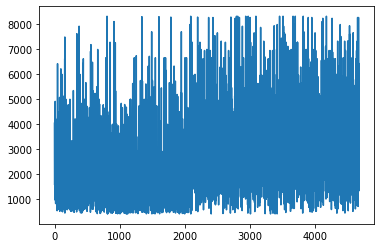

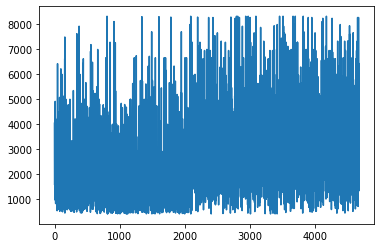

In [197]:
y = dataTemp4['price1']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
y[removed_outliers].plot().get_figure()

In [198]:
q = dataTemp4["price1"].quantile(0.99)

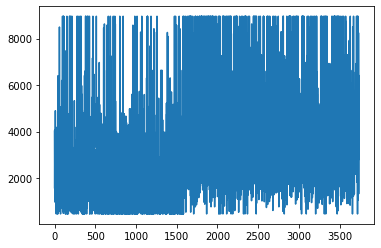

In [206]:
import pandas as pd
from scipy.stats import mstats
%matplotlib inline

transformed_test_data = pd.Series(mstats.winsorize(dataTemp['price1'], limits=[0.05, 0.05])) 
transformed_test_data.plot()

In [207]:
count=0
for i in range(dataTemp.shape[0]):
    if(dataTemp4['price1'][i]>q):
        count+=1
    

In [208]:
count #posibles datos anomalos

38

*Responder aqui la pregunta y su análisis*

### ¿Existe alguna relación entre el número de habitaciones y el precio?



In [209]:
dataTemp5=df

In [213]:
df.corr()

,price1,metros,techados,dormitorios,baños,estacionamientos
price1,1.000000,0.018418,0.457269,-0.000827,0.018392,0.037052
metros,0.018418,1.000000,0.171352,0.017464,0.040618,0.052346
techados,0.457269,0.171352,1.000000,0.065938,0.135775,0.156239
dormitorios,-0.000827,0.017464,0.065938,1.000000,0.498502,0.036414
baños,0.018392,0.040618,0.135775,0.498502,1.000000,0.261403
estacionamientos,0.037052,0.052346,0.156239,0.036414,0.261403,1.000000


In [211]:
dataTemp5['dormitorios'].corr(dataTemp5['price1'])

-0.000827414430736293

*Tiene como correlación: -0.000827414430736293*

## Preparación de Datos (9 Puntos)

Luego de haber realizado el análisis de los datos, procederemos con la preparación final antes del modelado. Recuerde que la mayor parte de los modelos de Machine Learning reciben como entrada solamente valores numéricos. Sus tareas en esta fase serán:

1. (2 puntos) Agregar y/o eliminar características.

2. (Opcional - 2 puntos) Detectar y tratar valores atípicos (outliers).
3. (1 punto) Separar características de variable objetivo (`price1`)
4. (1 punto) Preprocesar características númericas.
5. (1 punto) Preprocesar características categóricas.
6. (1 punto) Crear una función o clase que permita hacer toda la preparación de datos para un dataset determinado. Usaremos está función para preparar los datos de entrenamiento y prueba por separado. También puede hacer uso de la clase [Pipeline](https://scikit-learn.org/stable/modules/compose.html) de scikit-learn (Recomendado).

In [215]:
#1: Agregar y/o eliminar características.
dfTempModelo=df
dfTempModelo.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,Lima,Lima,La Molina,240,240,4,3,1
1,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,Lima,Lima,La Molina,1050,300,0,0,0
2,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,Lima,Lima,San Isidro,450,450,5,5,3
3,Super destacado,Venta de Casa en Santiago de Surco,1261.0,Lima,Lima,Santiago de Surco,300,181,4,3,0
4,Super destacado,Se Vende Hermosa y Espectacular Casa en Condom...,1254.0,Lima,Lima,La Molina,286,286,3,4,2


In [216]:
#eliminamos la columna de title
dfTempModelo=dfTempModelo.drop(['title'],axis=1)

In [217]:
dfTempModelo.head()

,l_tag,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Super destacado,1582.0,Lima,Lima,La Molina,240,240,4,3,1
1,Super destacado,4050.0,Lima,Lima,La Molina,1050,300,0,0,0
2,Super destacado,2822.0,Lima,Lima,San Isidro,450,450,5,5,3
3,Super destacado,1261.0,Lima,Lima,Santiago de Surco,300,181,4,3,0
4,Super destacado,1254.0,Lima,Lima,La Molina,286,286,3,4,2


In [218]:
dfTempModelo.shape #vemos cuantos datos tenemos

(4674, 10)

In [223]:
#Detectar y tratar valores atípicos (outliers).
transformed_test_data = pd.Series(mstats.winsorize(dataTemp['price1'], limits=[0.05, 0.05])) 

In [224]:
transformed_test_data.shape

(3737,)

In [221]:
transformed_test_data.head()

0    1582.0
1    4050.0
2    2822.0
3    1261.0
4    1254.0
dtype: float64

In [227]:
#dfTempModelo2=dfTempModelo
#dfTempModelo2=dfTempModelo2[dfTempModelo2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [ ]:
#(1 punto) Separar características de variable objetivo (price1)
    #Se hizo anteriormente
#(1 punto) Preprocesar características númericas.
    #Se hizo anteriormente

In [ ]:
#Preprocesar características categóricas.

In [235]:
pd.get_dummies(dfTempModelo['l_tag'])

,Destacado,No Category,Super destacado
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
4669,0,1,0
4670,0,1,0
4671,0,1,0
4672,0,1,0


In [236]:
result = pd.concat([dfTempModelo, pd.get_dummies(dfTempModelo['l_tag'])], axis=1, sort=False)

In [237]:
result.head()

,l_tag,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos,Destacado,No Category,Super destacado
0,Super destacado,1582.0,Lima,Lima,La Molina,240,240,4,3,1,0,0,1
1,Super destacado,4050.0,Lima,Lima,La Molina,1050,300,0,0,0,0,0,1
2,Super destacado,2822.0,Lima,Lima,San Isidro,450,450,5,5,3,0,0,1
3,Super destacado,1261.0,Lima,Lima,Santiago de Surco,300,181,4,3,0,0,0,1
4,Super destacado,1254.0,Lima,Lima,La Molina,286,286,3,4,2,0,0,1


In [239]:
result=result.drop(['l_tag'],axis=1)

In [242]:
result=pd.get_dummies(result)

In [244]:
result.dtypes

price1                  float64
metros                    int64
techados                  int64
dormitorios               int64
baños                     int64
                         ...   
distrito_Wanchaq          uint8
distrito_Yanahuara        uint8
distrito_Yarinacocha      uint8
distrito_Zarumilla        uint8
distrito_Zorritos         uint8
Length: 223, dtype: object

In [245]:
result.shape

(4674, 223)

## Modelado (17 Puntos)

En esta estapa nos dedicaremos a usar nuestros conocimientos de Machine Learning para entrenar diferentes modelos y usar diferentes técnicas para mejorar los resultados. La evaluación estará basada en la métrica accuracy.

1. (1 punto) Para los siguientes pasos evaluar su modelo con validación cruzada, usando la métrica de accuracy.
2. (1 punto por clasificador) Utilize como mínimo $2$ clasificadores aprendidos para evaluar su solución (K-NN, Naive Bayes, Logistic Regression, Decision Trees). Muestre los resultados obtenidos e indique por qué algunos clasificadores son mejores que otros.
3. (1 punto) Realice la búsqueda de hiperparámetros para cada modelo (Grid Search o Random Search) y vuelva a mostrar sus resultados.
4. (1 punto por modelo) Utilize modelos de ensamble para ver si podemos mejorar nuestra solución (Bagging, Boosting y Stacking). Específique los modelos que está usando y muestre resultados.
5. (Opcional - 1 punto por modelo) Utilize una o más de las siguientes librerías para evaluar su modelo con Gradient Boosting: [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_intro.html), [CatBoost](https://catboost.ai/docs/concepts/python-usages-examples.html).
6. (Opcional - 5 puntos) Importancia de Características:

  6.1. (2 puntos) Obtenga la importancia de características usando Decision Trees y/o Random Forest. Muestre la importancia ordenada de mayor a menor y vuelva a entrenar su modelo con las características más importantes.

  6.2. (1 punto)  Responda las siguientes preguntas: ¿Cuales son las características más importantes? ¿Cuántas características está considerando en su nuevo modelo y por qué? ¿Usando menos características mejora la métrica de clasificación?

  6.3. (2 puntos) Analice las características más importantes haciendo uso de visualizaciones y explique sus conclusiones.

Las tareas opcionales si bien no son obligatorias, son muy recomendables para que tengan un mejor conocimiento de las librerías más usadas a parte de scikit-learn y para entender mejor la importancia de características que algunos modelos nos brindan.

*Para instalar nuevas librerías en colab puede hacer uso del comando !pip install. Por ejemplo para instalar CatBoost, podemos hacerlo de la siguiente manera: !pip install catboost*

**Importante:** Al entrenar sus modelos puede que en algún momento lleguen a obtener $100\%$ de accuracy durante el entrenamiento, incluso con validación cruzada. Esto puede deberse a un problema de **data leakage** donde nuestra data de entrenamiento contiene información de la variable que deseamos predecir (`price1`). Para ello es recomendable entender las características y revisar cuales están ocasionando el data leakage. 

In [274]:
resultBackup=result

In [275]:
result['price1']=result['price1'].astype(int) #modificamos nuestra salida

In [ ]:
# VAMOS A COMPROBAR SI ES DESTACADO O NO

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result.drop('Super destacado',axis=1), 
                                                    result['Super destacado'], test_size=0.30, random_state=101)

In [277]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [278]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1365
           1       0.50      0.05      0.10        38

    accuracy                           0.97      1403
   macro avg       0.74      0.53      0.54      1403
weighted avg       0.96      0.97      0.96      1403



In [279]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [280]:
knn.score(X_test, y_test)

0.9722024233784747

In [289]:
columnas= result.columns

In [286]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

In [287]:
clf = GridSearchCV(svc, parameters)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [299]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [300]:
import xgboost as xgb

In [301]:
dtrain = xgb.DMatrix(X_test, label=y_test)

In [303]:
dtrain = xgb.DMatrix(X_test)
dtrain.save_binary('train.buffer')


In [ ]:
#Preguntas:
# Responda las siguientes preguntas: 
#¿Cuales son las características más importantes? 
    # Price, Numero de baños,dormitorios,techadao,provincia,distrito,departamento,categoria
#¿Cuántas características está considerando en su nuevo modelo y por qué? 
    #223, trate de optimizar todo lo que se podía y al final me quedko este resultado
#¿Usando menos características mejora la métrica de clasificación?
    # a mi parecer sí, la columna de departamentos, provincia y distrito al aplicarle get_dummies no me parece que sea la mejor solución...
# Analice las características más importantes haciendo uso de visualizaciones y explique sus conclusiones.
    

In [305]:
dataT=dataBackup

In [306]:
dataT.head()

,l_tag,title,price1,departamento,provincia,distrito,metros,techados,dormitorios,baños,estacionamientos
0,Super destacado,Vendo Casa Urb. Santa Patricia 1ra Etapa – La ...,1582.0,Lima,Lima,La Molina,240,240,4,3,1
1,Super destacado,Venta de Casa en El Sol de La Molina,4050.0,Lima,Lima,La Molina,1050,300,0,0,0
2,Super destacado,Rebajada! Venta de Casa en San Isidro,2822.0,Lima,Lima,San Isidro,450,450,5,5,3
3,Super destacado,Venta de Casa en Santiago de Surco,1261.0,Lima,Lima,Santiago de Surco,300,181,4,3,0
4,Super destacado,Se Vende Hermosa y Espectacular Casa en Condom...,1254.0,Lima,Lima,La Molina,286,286,3,4,2


In [314]:
dataT2 = dataT.groupby(['l_tag'])['price1'].mean()

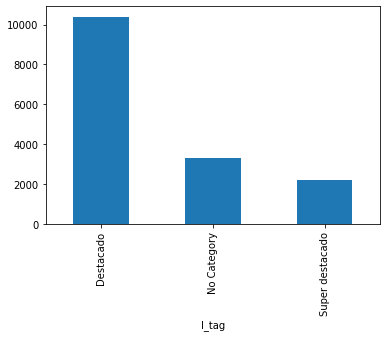

In [315]:
dataT2.plot.bar()

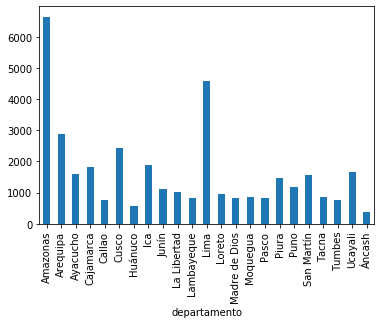

In [316]:
dataT2 = dataT.groupby(['departamento'])['price1'].mean()
dataT2.plot.bar()

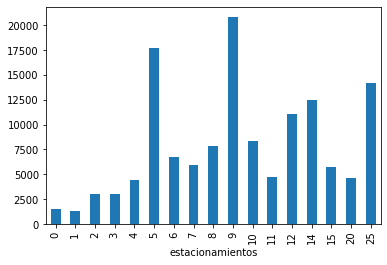

In [321]:
dataT2 = dataT.groupby(['estacionamientos'])['price1'].mean()
dataT2.plot.bar()

In [ ]:
#Nota: Profesor, extrañamente mi pc cada vez se hacía muy lenta, y me cuesta mucho compilar las imágenes
#le cuento esto porque me parece que se estan guardando los dataframes en memoria
#sin embargo, se logro gran parte del trabajo 
#Gracias por tan excelebnte módulo!
#Saludos.